In [18]:
# from IPython.display import Audio, display
import matplotlib.pyplot as plt
# from numpy import fft
import numpy as np
# import pydub
from scipy.fftpack import fft
import scipy
from scipy.io import wavfile

# import urllib

# AUDIO_URL='http://downloads.bbc.co.uk/rmhttp/radio4/science/Birdsong-Blackbird.mp3'
# temp_folder = '/home/bill/data/tmp/'


# urllib.request.urlretrieve(AUDIO_URL, temp_folder+'file.mp3')
# #read mp3 file
# mp3 = pydub.AudioSegment.from_mp3(temp_folder+"file.mp3")
# #convert to wav
# mp3.export(temp_folder+"file.wav", format="wav")

In [27]:
freq, audio_data = scipy.io.wavfile.read("birds.wav")
length = audio_data.shape[0]/freq
channels = audio_data.shape[1]
print('freq: {} length: {} channels: {}'.format(freq, length, channels))

freq: 48000 length: 4.390666666666666 channels: 2


In [28]:
#if stereo grab both channels
channel1 = audio_data[:,0] #left
channel2 = audio_data[:,1] #right

In [29]:
#create a time variable in seconds
time = np.arange(0, float(audio_data.shape[0]), 1) / freq
print(time)

[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 4.39060417e+00
 4.39062500e+00 4.39064583e+00]


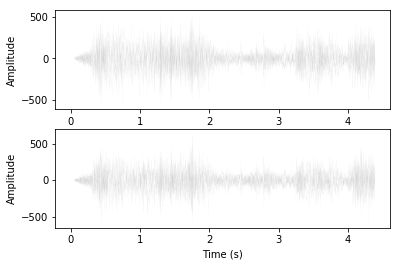

In [30]:
#plot amplitude (or loudness) over time
plt.figure(1)
plt.subplot(211)
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#000000')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time, channel2, linewidth=0.01, alpha=0.7, color='#000000')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [31]:
fourier=fft(channel1)

n = len(channel1)
fourier = fourier[0:int(n/2)]

In [32]:
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)

In [33]:
#calculate the frequency at each point in Hz
freq_array = np.arange(0, (n/2), 1.0) * (freq*1.0/n);

C:\Users\annav\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'power in dB')

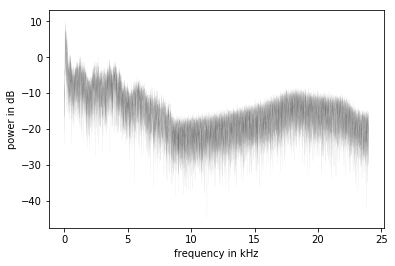

In [34]:
plt.plot(freq_array/1000, 10*np.log10(fourier), color='#000000', linewidth=0.02)
plt.xlabel('frequency in kHz')
plt.ylabel('power in dB')
# plt.savefig(temp_folder+'spectrogram.png')